In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nbsetup
from models.load import load, load_components
from references import milkyway as mref


In [2]:
mm = load_components('mcmillian2011best_900_40', mref.profiles['mcmillian2011best'])

Loaded mcmillian2011best_900_40_thin


In [3]:
huang = load_components('huang2016_900_40', mref.profiles['huang2016'])

Loaded huang2016_900_40_gas


In [13]:
def vkms(arr, r):
    return (np.abs(r*arr)**0.5)

def plot_velocities(self, dimension='x', xlim=(0,None), ratio_adjust=False, log=False):
        
    df = self.dataframe
    sums = self.dataframe_sum()
    r = df['rd'].unique()
    veckey = '%s_vec' % dimension
    gx = np.abs(sums[veckey]).to_numpy()
    ax = sums['%s_abs' % dimension].to_numpy()
    ex = ax-gx
    
    trials = {
        #'subtraction': 5*(1-(ex/gx)**0.1),
        'ex/gx': 3.8*((1+(ex/gx)**0.5)**-1),
        'ex': 8.6*((1+(ex)**0.15)**-1),
    }
    
    fig, axes = plt.subplots(2, 1, figsize=(20,20))
    
    # components
    comp_sum = []
    for component in df['component'].unique():
        vels = vkms(df.query('component=="%s"' % component)[veckey].to_numpy(), r)
        comp_sum.append(vels**2)
        sns.lineplot(x=r, y=vels, ax=axes[0], label=component, linestyle='dotted')
        
    sns.lineplot(x=r, y=vkms(sums[veckey].to_numpy(), r), ax=axes[0], linestyle='dotted', label='sum')
    sns.lineplot(x=r, y=np.sum(comp_sum, axis=0)**0.5, ax=axes[0], linestyle='dashed', label='sum v2')
    
    # components adjusted
    if ratio_adjust:
        ratios = self.mass_ratios()
        comp_sum = []
        for component in df['component'].unique():
            vels = vkms(df.query('component=="%s"' % component)[veckey].to_numpy()/ratios[component], r)
            comp_sum.append(vels**2)
            sns.lineplot(x=r, y=vels, ax=axes[0], label="%s normalised" % component, linestyle='dashed')
        sns.lineplot(x=r, y=np.sum(comp_sum, axis=0)**0.5, ax=axes[0], linestyle='dashed', label='sum adj')
    
    for label, formula in trials.items():
        sns.lineplot(x=r, y=vkms(gx*formula, r), ax=axes[0], label=label)
        sns.lineplot(x=r, y=vkms(formula, r), ax=axes[1], label=label)
    
    # observations
    axes[0].set(xlim=xlim)
    if log: axes[0].set(xscale='log')
    for key, obs in mref.observations.items():
        sns.scatterplot(x=obs['radius'], y=np.array(obs['velocity']), ax=axes[0], label=key).set(xlim=xlim)
        

    

In [12]:
mm.mass_ratios(True)

buldge is 10.97% off, at 9876569665.65033 against reference [8900000000.0, 9790000000.0, 8010000000.0]
thick is 0.06% off, at 14431072181.35253 against reference [14421813770.965961, 15863995148.06256, 12979632393.869366]
thin is 0.73% off, at 43465433261.18319 against reference [43150441114.698364, 47465485226.168205, 38835397003.22853]


{'buldge': 1.1097269287247562,
 'thick': 1.0006419726765026,
 'thin': 1.0072998592447189}

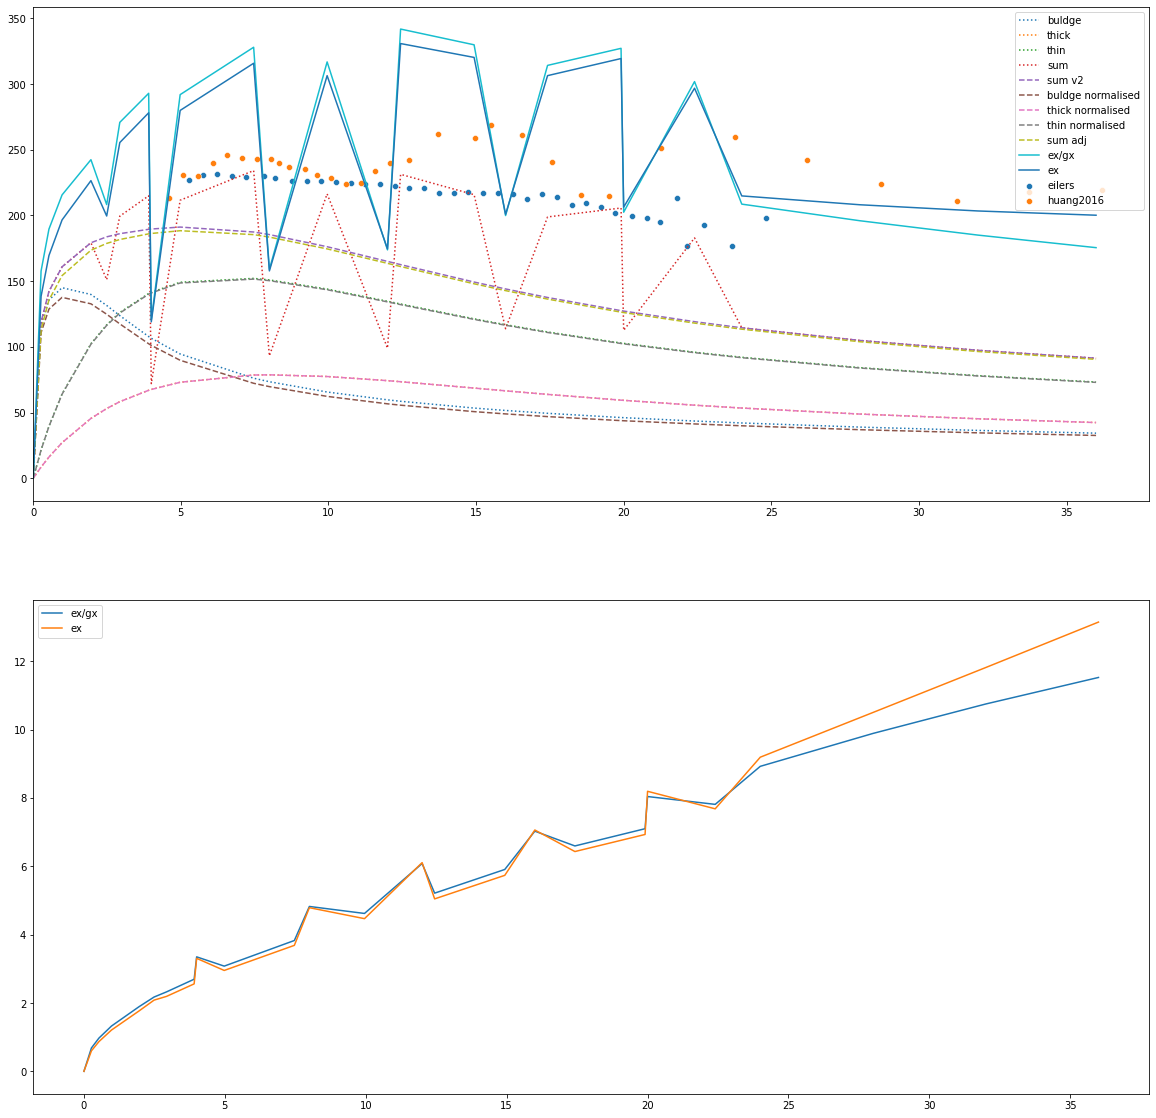

In [16]:
plot_velocities(mm, xlim=(0,None), log=False, ratio_adjust=True)

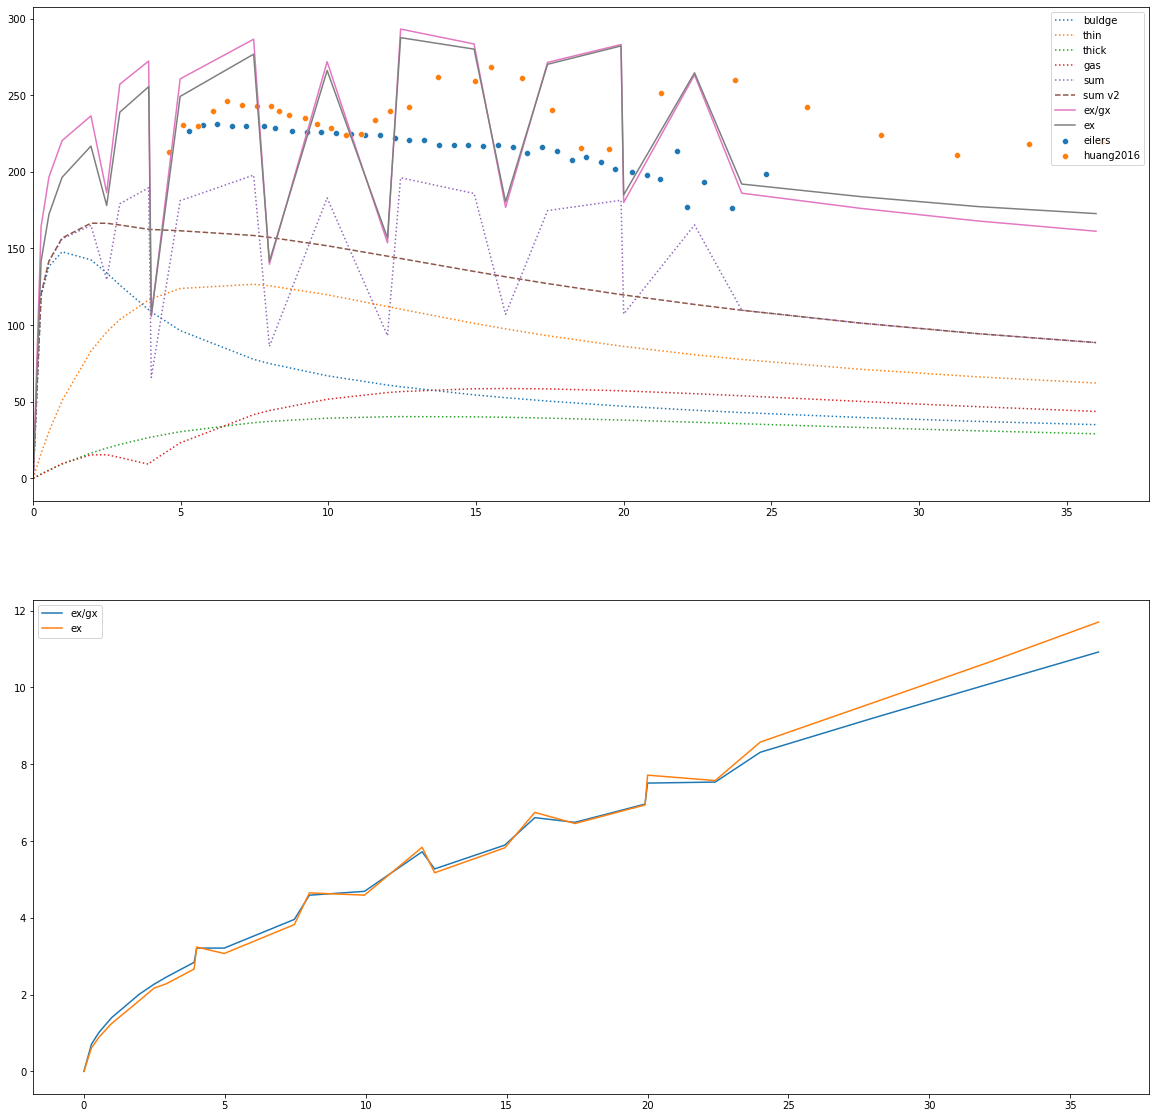

In [14]:
plot_velocities(huang, xlim=(0,None), log=False, ratio_adjust=False)

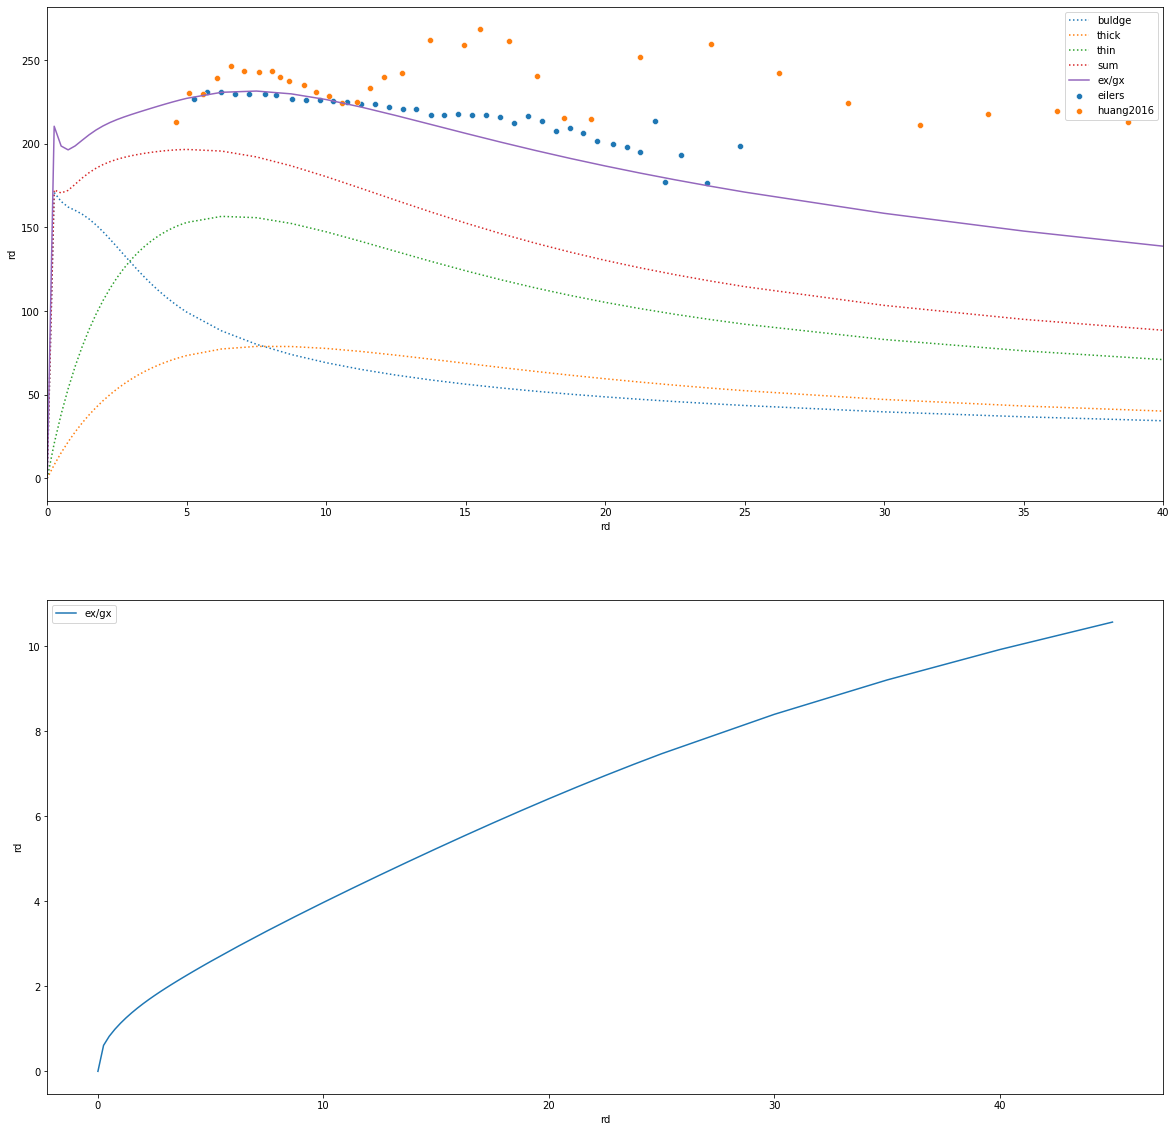

In [22]:
plot_velocities(mhalf, 'x', xlim=(0,40))

In [4]:
mgran.mass_ratios(speak=True)

buldge is 11.78% off, at 9948776864.304314 against reference [8900000000.0, 9790000000.0, 8010000000.0]
thick is 0.16% off, at 14444775958.025257 against reference [14421813770.965961, 15863995148.06256, 12979632393.869366]
thin is 1.44% off, at 43773042939.519745 against reference [43150441114.698364, 47465485226.168205, 38835397003.22853]


{'buldge': 1.1178400971128442,
 'thick': 1.0015921844106408,
 'thin': 1.014428631752951}

In [19]:
mhalf.mass_analysis()

buldge is 23.58% off, at 10998371429.309143 against reference [8900000000.0, 9790000000.0, 8010000000.0]
thick is 0.64% off, at 14514412229.366518 against reference [14421813770.965961, 15863995148.06256, 12979632393.869366]
thin is 5.72% off, at 45620194746.680565 against reference [43150441114.698364, 47465485226.168205, 38835397003.22853]


In [16]:
mm.mass_analysis()

buldge is 23.58% off, at 10998371429.309143 against reference [8900000000.0, 9790000000.0, 8010000000.0]
thick is 0.64% off, at 14514655309.322094 against reference [14421813770.965961, 15863995148.06256, 12979632393.869366]
thin is 5.72% off, at 45620205063.69617 against reference [43150441114.698364, 47465485226.168205, 38835397003.22853]


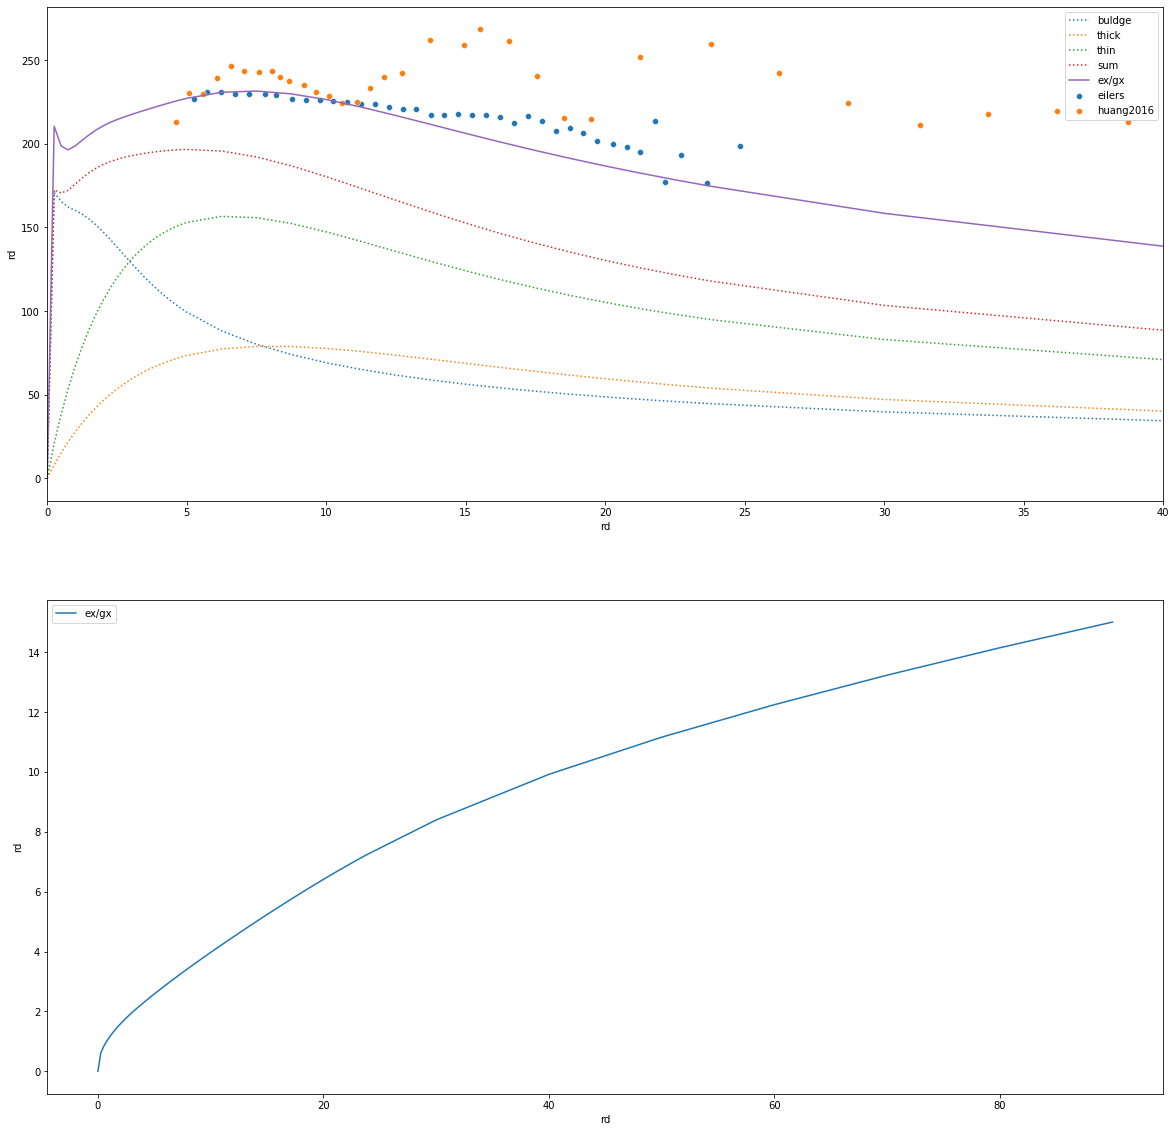

In [23]:
plot_velocities(mm, 'x', xlim=(0,40))

In [80]:
mm.profiles = mref.profiles['mcmillian2011best']